# <span> Laboratorio di Simulazione Numerica  </span>
## <span> Esercitazione 12 </span>

In questa esercitazione utilizziamo due tipi di reti neurali per risolvere un problema di classificazione: riconoscere le cifre da $0$ a $9$ scritte a mano, fornite in immagini quadrate da $28 \times 28$ pixel. Come set di dati si sfrutta il dataset MNIST, che contiene $70000$ immagini di queste cifre: $60000$ immagini vengono usate per l'allenamento della rete e le restanti $10000$ per la validazione.

### Esercizio 12.1

In questo esercizio viene utilizzata una rete neurale <b>DNN</b> (<i>Deep Neural Network</i>) di tipo sequenziale. Il layer di input è costituito da un numero di neuroni pari al numero di pixel dell'immagine, ovvero $784$, ognuno dei quali. Sono poi presenti due layer nascosti di tipo <i>Dense</i>, rispettivamente costituiti da $400$ e $100$ neuroni, entrambi con funzione di attivazione <i>Relu</i>. Il layer di output è formato da $10$ neuroni con funzione di attivazione <i>Softmax</i>, che permette di trasformare i numeri in probabilità: infatti a ogni neurone di output è associata una cifra tra $0$ e $9$ e l'output del neurone è la probabilità che l'immagine rappresenti tale cifra. È stato inserito anche un layer di <i>Dropout</i>: questo, durante la fase di allenamento della rete, spegne alcuni neuroni con probabilità pari al $50\%$ in modo da non vincolare la rete all'utilizzo di ogni suo neurone. La rete viene allenata per $15$ epoche.

In questo primo esercizio studiamo come varia la performance della rete cambiando l'ottimizzatore. Sono stati utilizzati i seguenti ottimizzatori: <i>SGD</i>, <i>Adam</i>, <i>Adagrad</i>, <i>Adadelta</i> e <i>RMSprop</i>.  Per ogni caso considerata viene riportato l'andamento dell'accuratezza e della funzione costo all'aumentare del numero di epoche sia per i dati di training che di validazione. Successivamente viene riportata la predizione della rete delle prime $10$ cifre estratte dal dataset MNIST.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from tensorflow.keras.datasets import mnist

import os
os.environ['AUTOGRAPH VERBOSITY'] = '10'
tf.autograph.set_verbosity(0)
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

%config InlineBackend.figure_format = 'retina'

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)  

# training parameters
batch_size = 32

In [2]:
def DNN(opt, N_epochs):
    
    # input image dimensions
    img_rows, img_cols = 28, 28 # number of pixels 
    # output
    num_classes = 10 # 10 digits

    # the data, split between train and test sets
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()
    
    # reshape data, it could depend on Keras backend
    X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

    # cast floats to single precision
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')

    # rescale data in interval [0,1]
    X_train /= 255
    X_test /= 255
    
    # convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
    Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
    Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)
    
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
   
    # compile the model
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])
    
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=N_epochs, verbose=0, validation_data=(X_test, Y_test))
    
    # evaluate model
    score = model.evaluate(X_test, Y_test, verbose=0)
    # print performance
    print()
    print('Test loss =', score[0])
    print('Test accuracy =', score[1])

    fig, ax = plt.subplots(1,2, figsize=(18,6))
    # summarize history for accuracy
    ax[0].plot(history.history['accuracy'], color='tab:blue')
    ax[0].plot(history.history['val_accuracy'], color='tab:orange')
    ax[0].set_ylabel('model accuracy', fontsize=12)
    ax[0].set_xlabel('epoch', fontsize=12)
    ax[0].set_title('Accuracy', fontsize=16)
    ax[0].legend(['train', 'test'], loc='best', fontsize=12)
    ax[0].grid(True)
    
    # summarize history for loss
    ax[1].plot(history.history['loss'], color='tab:blue')
    ax[1].plot(history.history['val_loss'], color='tab:orange')
    ax[1].set_ylabel('model loss', fontsize=12)
    ax[1].set_xlabel('epoch', fontsize=12)
    ax[1].set_title('Loss', fontsize=16)
    ax[1].legend(['Train', 'Test'], loc='best', fontsize=12)
    ax[1].grid(True)
    plt.show()
    
    predictions = model.predict(X_test)
    
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off') 
    plt.show()

#### SGD

2021-09-26 16:31:04.744677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-26 16:31:04.744831: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz



Test loss = 0.3284347355365753
Test accuracy = 0.9079999923706055


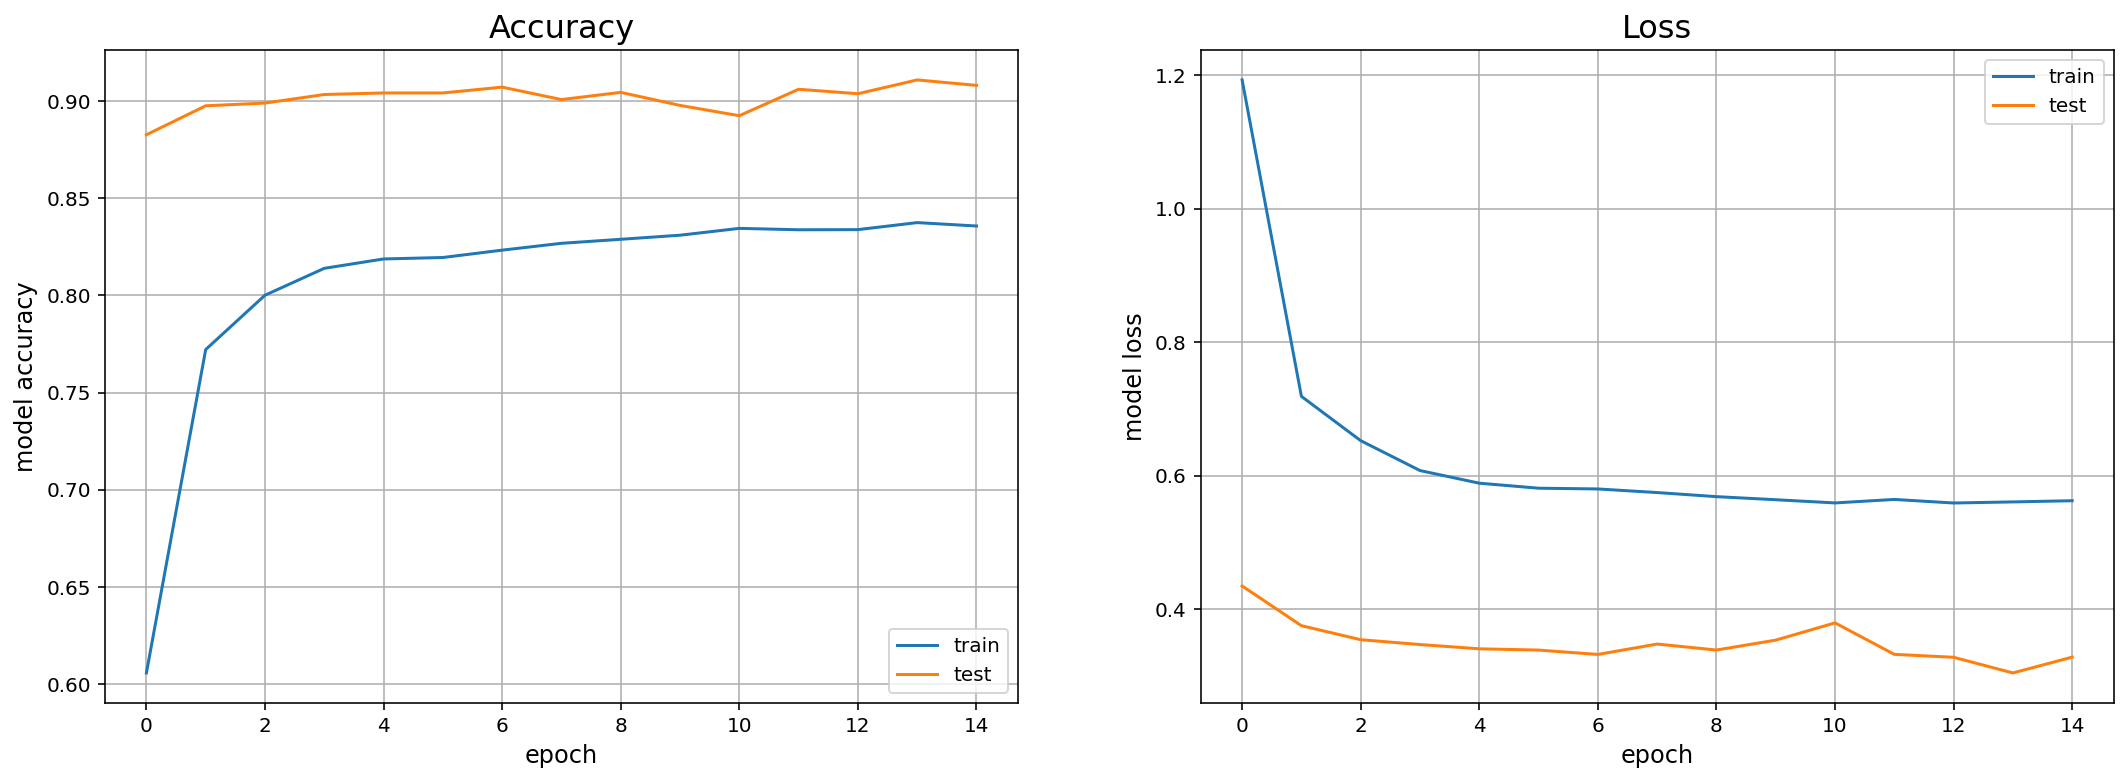

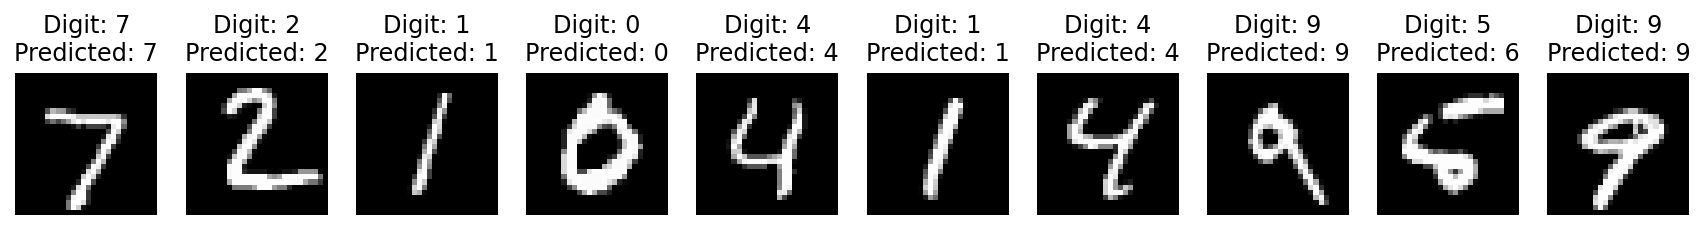

In [3]:
DNN(SGD(), 15)

Notiamo che la funzione costo valutata durante la fase di validazione è minore della funzione costo valutata durante la fase di allenamento: questo comportamento insolito è dovuto all'inserimento del Dropout, che agisce solamente nella fase di training.

L'accuratezza raggiunta tramite l'ottimizzatore <i>SGD</i> si avvicina al $91\%$. Proviamo a vedere se riusciamo ad aumentare l'accuratezza della rete andando a modificare i parametri dell'algortimo di ottimizzazione: modifichiamo il learning rate, introducendo il suo decadimento e introduciamo anche il momento di Nesterov.


Test loss = 0.10528021305799484
Test accuracy = 0.972000002861023


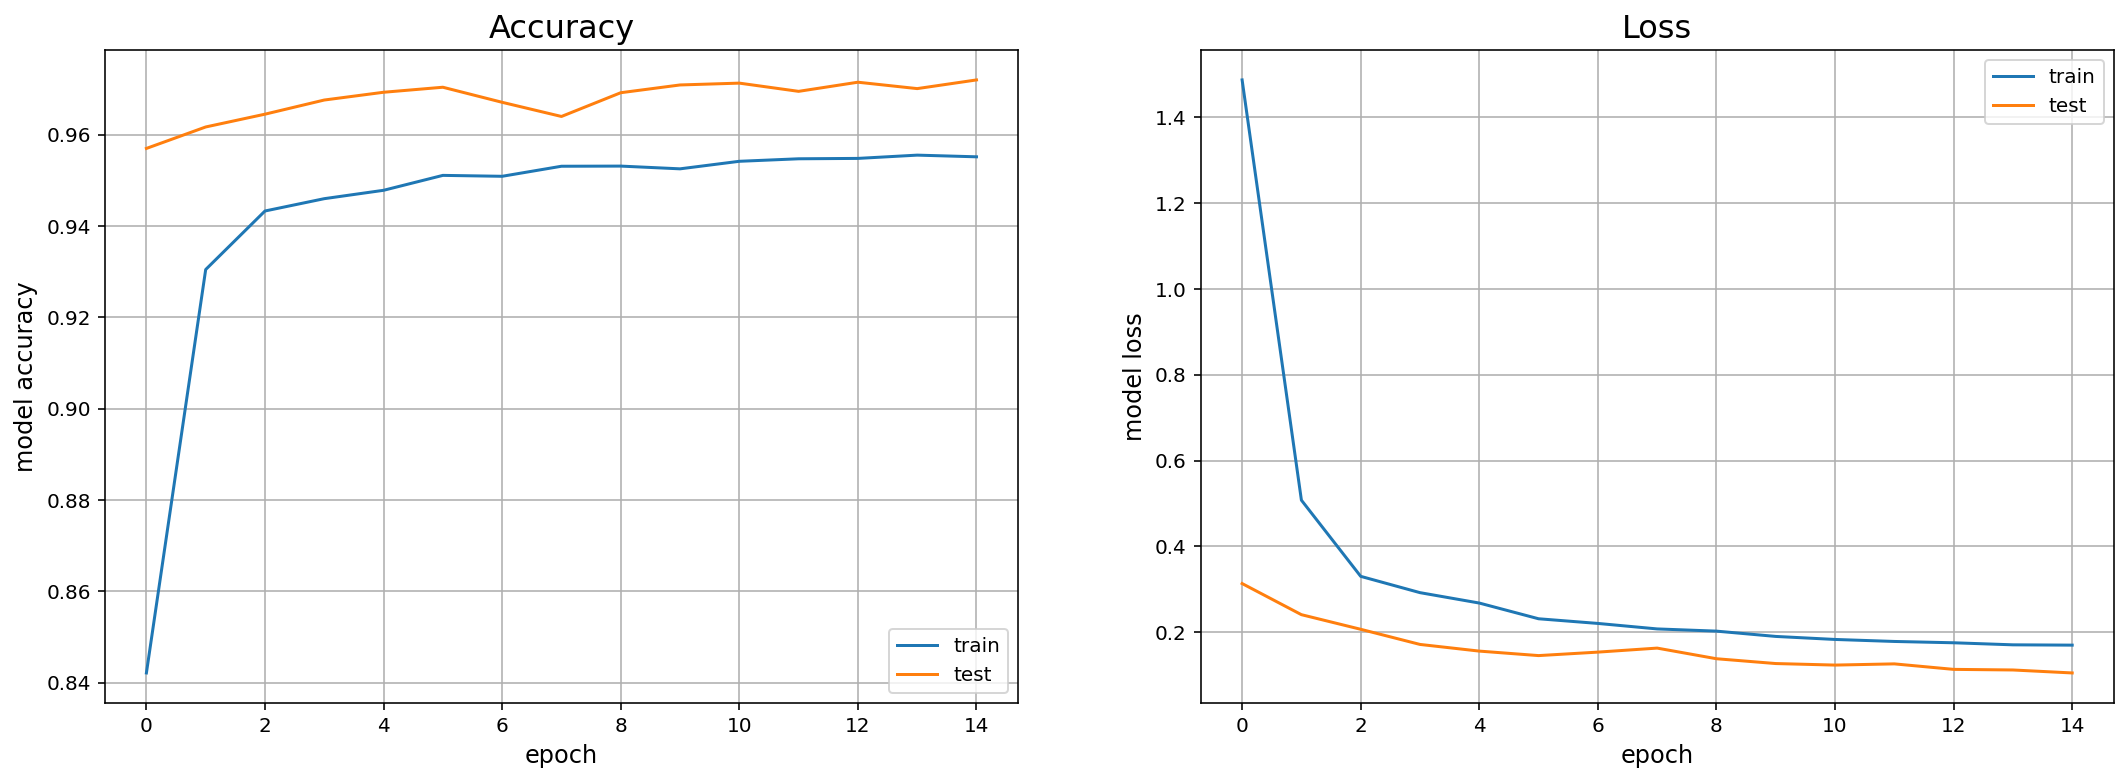

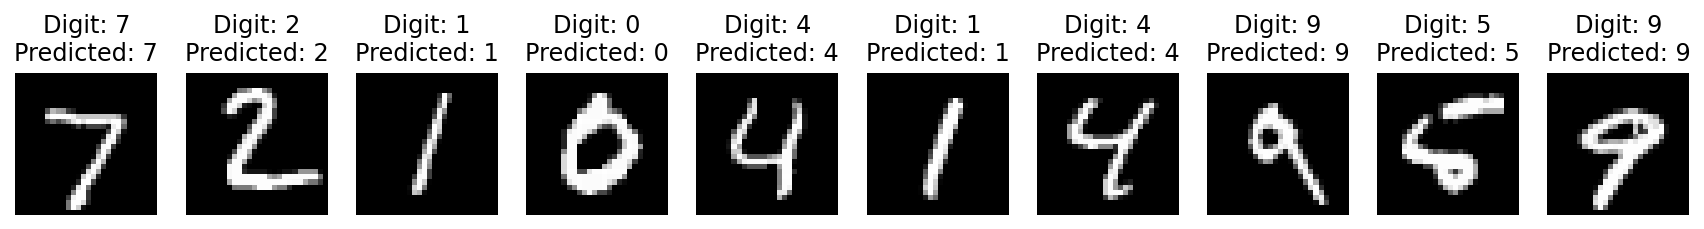

In [4]:
DNN(SGD(lr=0.05, decay=1e-3, momentum=0.9, nesterov=True), 15)

Come si può vedere è migliorata l'accuratezza della rete ed è anche diminuita la funzione costo.

#### Adam

In questo caso si possono effettuare solamente $5$ epoche di allenamento della rete prima di incorrere nel problema di overfitting.


Test loss = 0.3070451617240906
Test accuracy = 0.9617999792098999


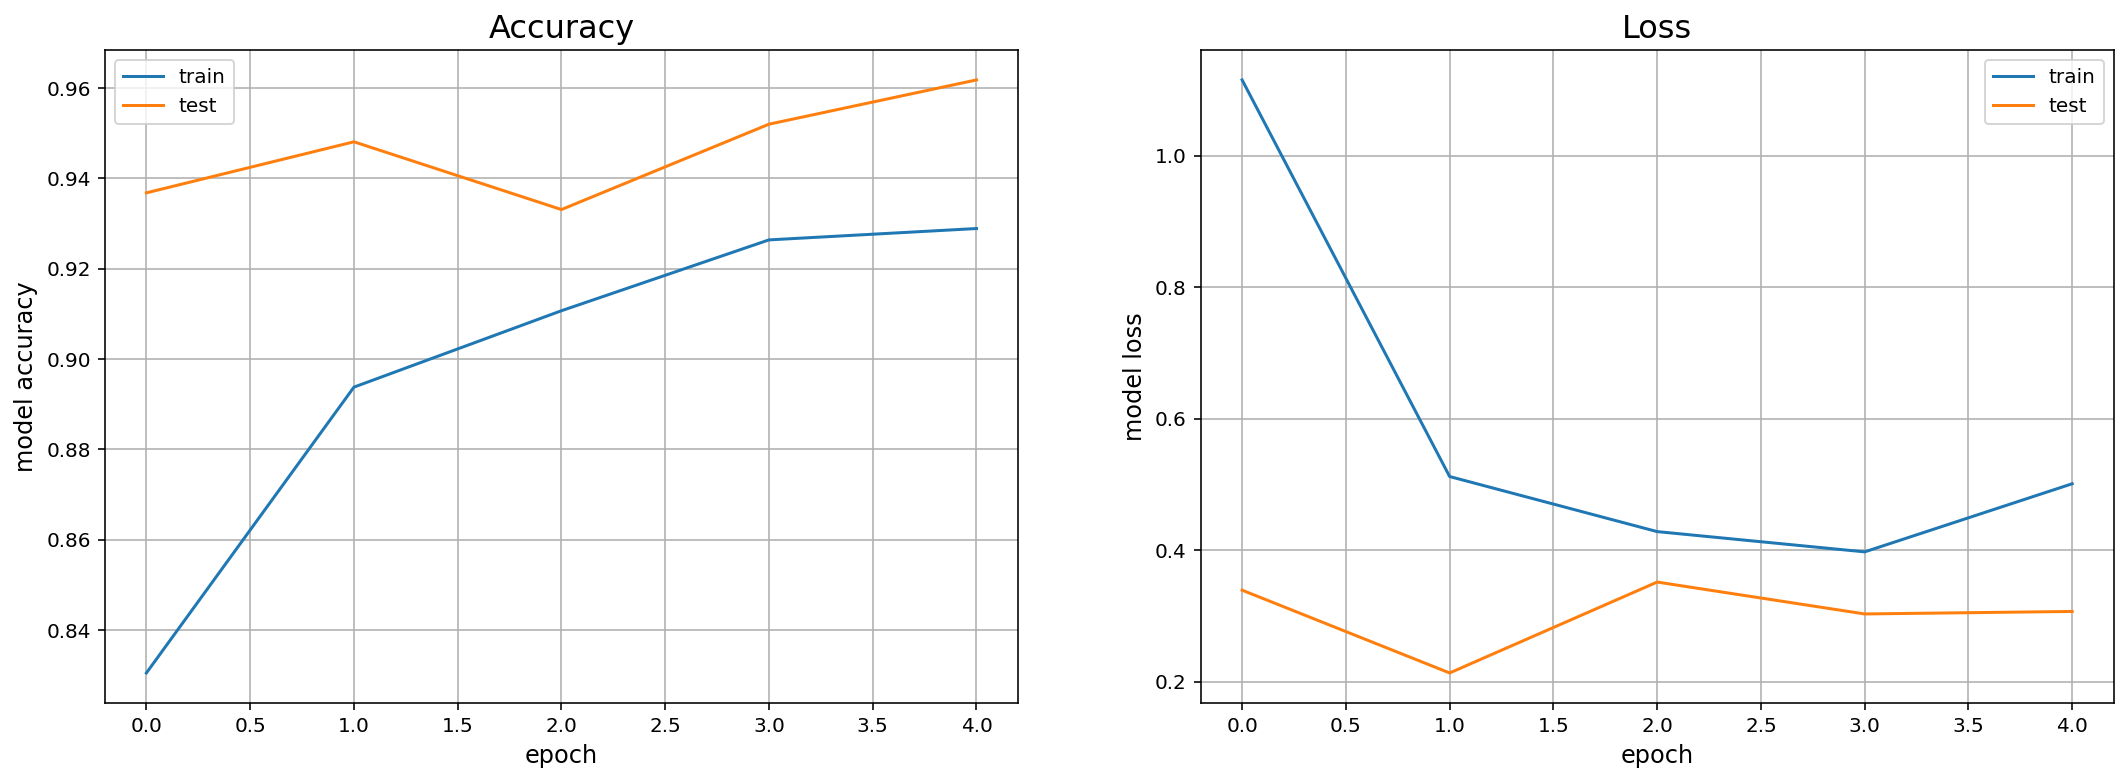

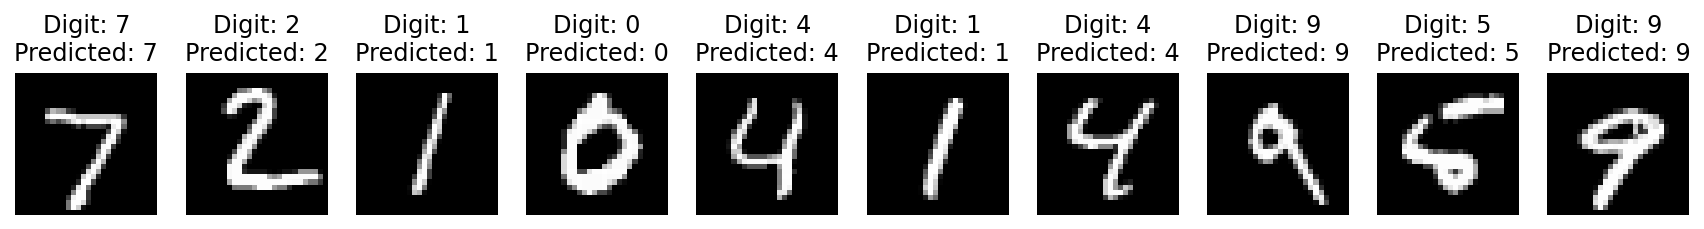

In [5]:
DNN(Adam(), 5)

#### Adagrad


Test loss = 0.25408026576042175
Test accuracy = 0.9311000108718872


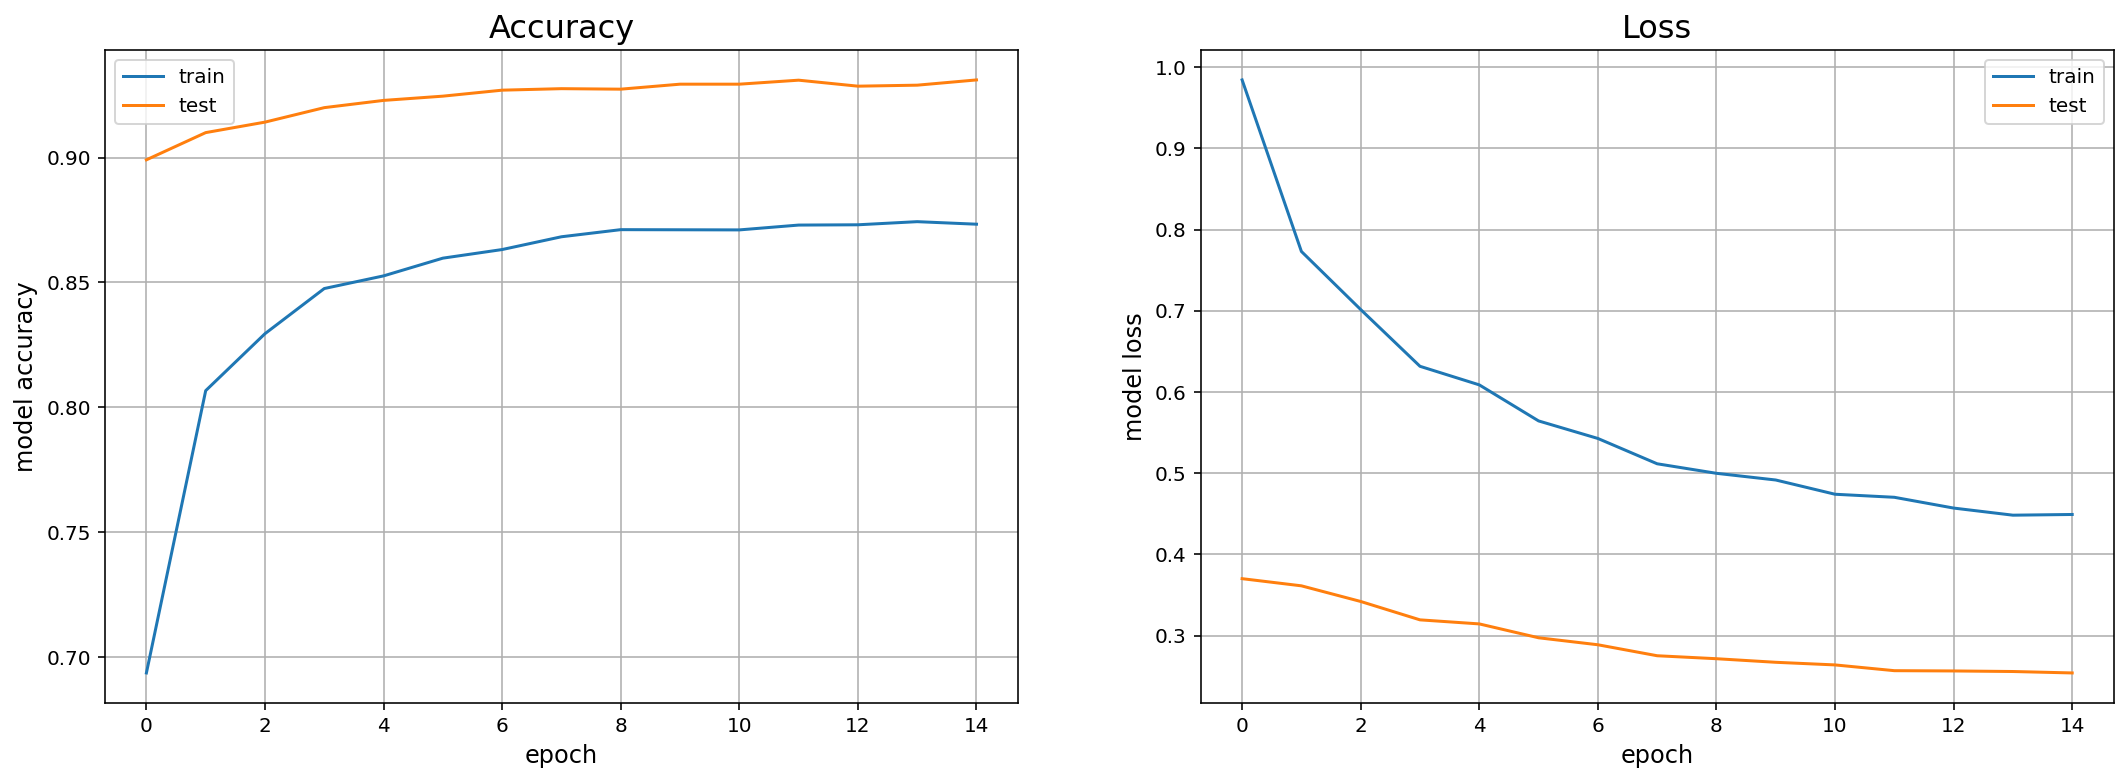

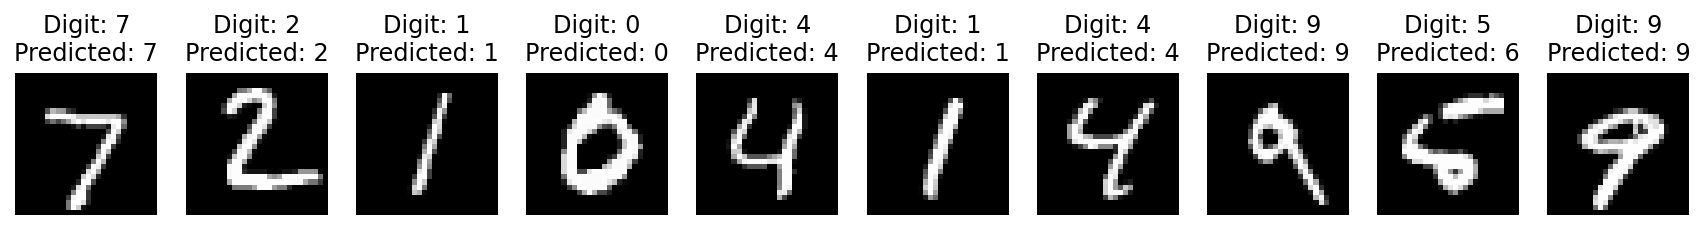

In [6]:
DNN(Adagrad(lr=0.01, epsilon=None, decay=0.0), 15)

#### Adadelta


Test loss = 0.1987445205450058
Test accuracy = 0.967199981212616


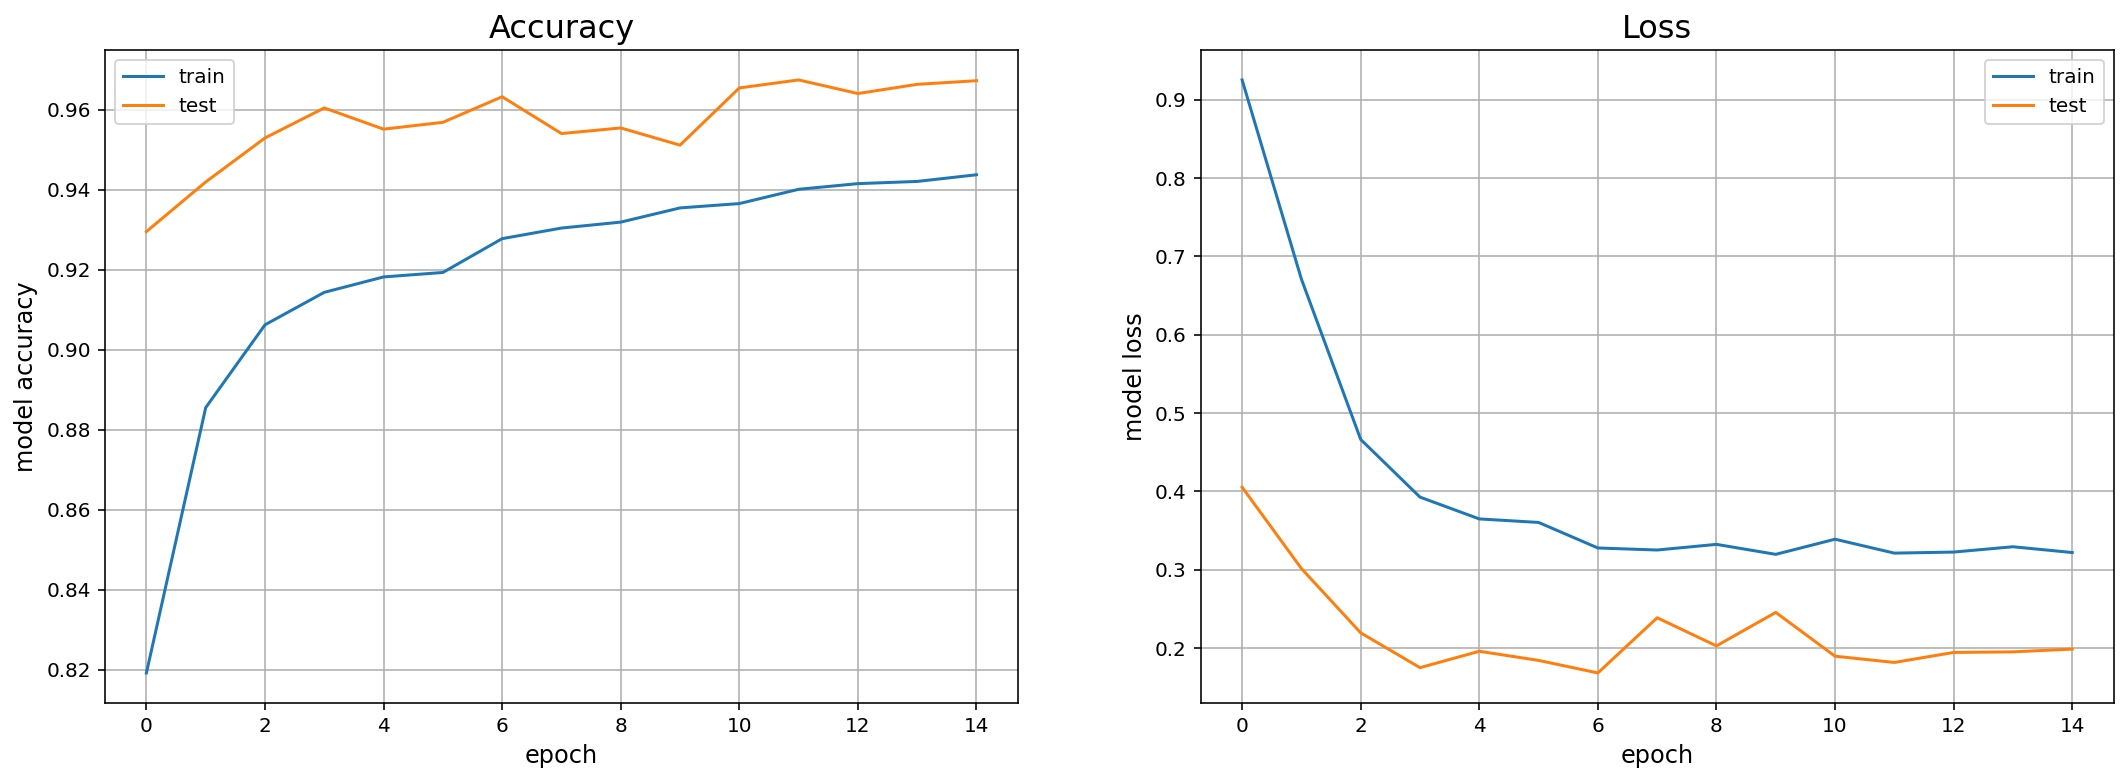

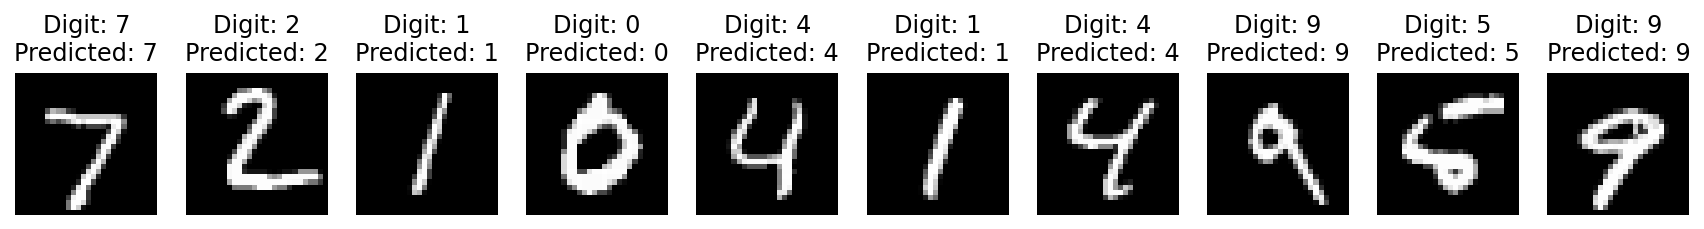

In [7]:
DNN(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 15)

#### RMSprop


Test loss = 0.4346188008785248
Test accuracy = 0.9721999764442444


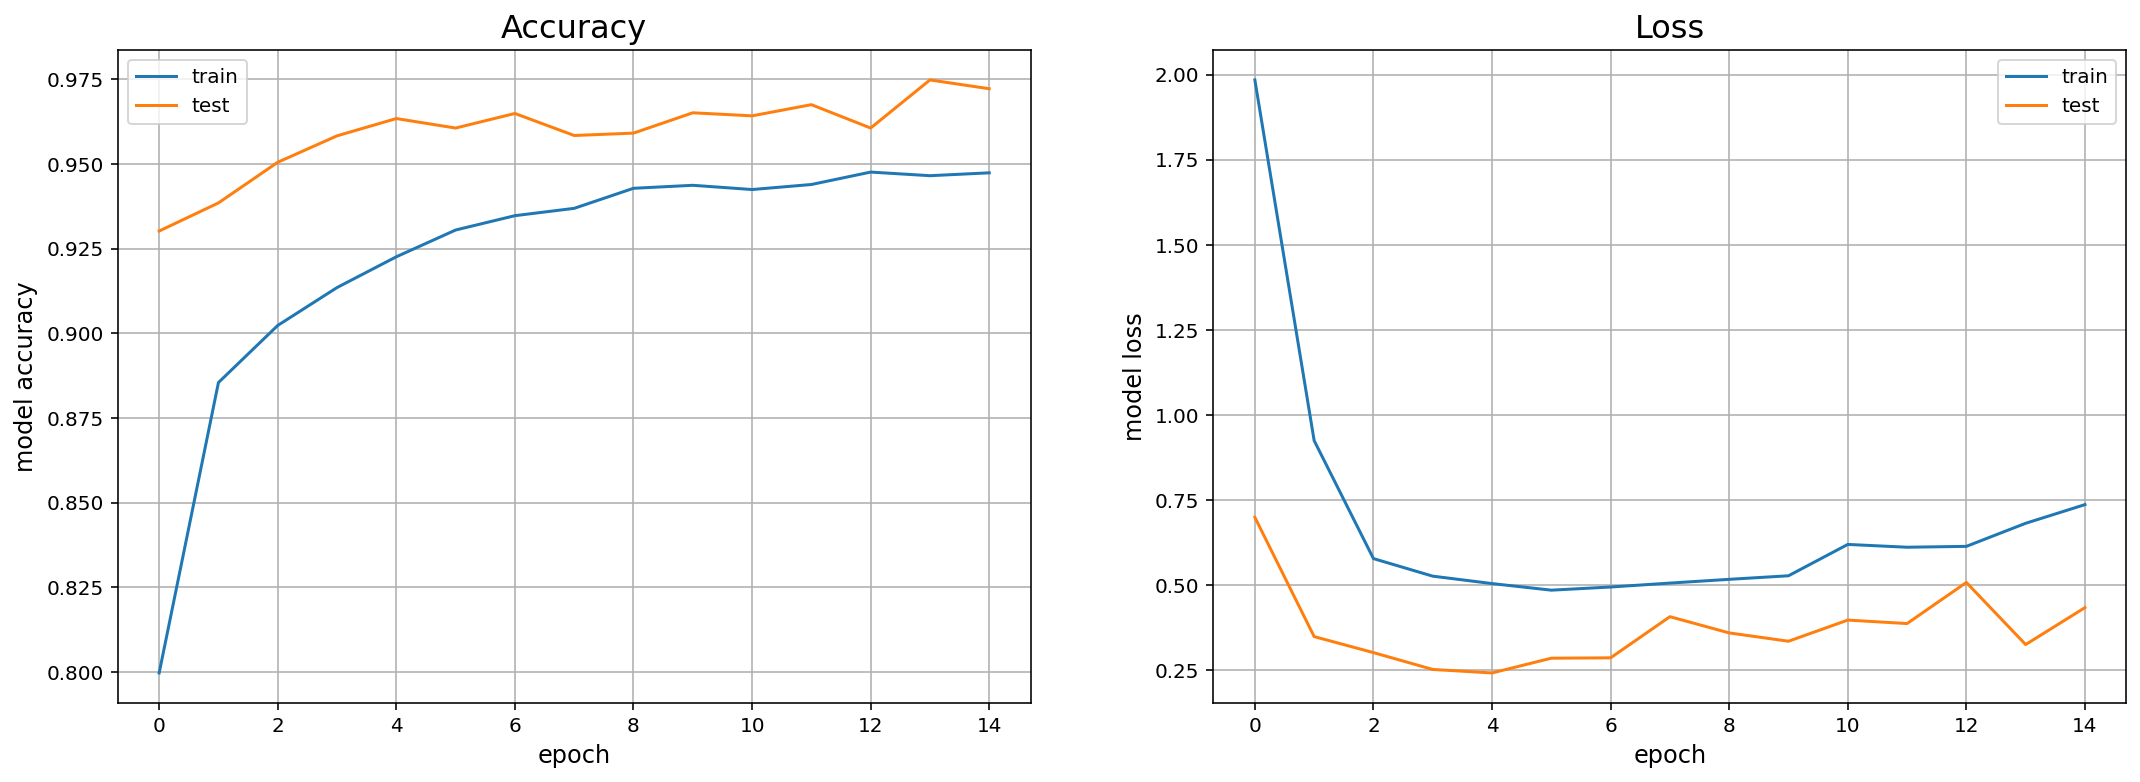

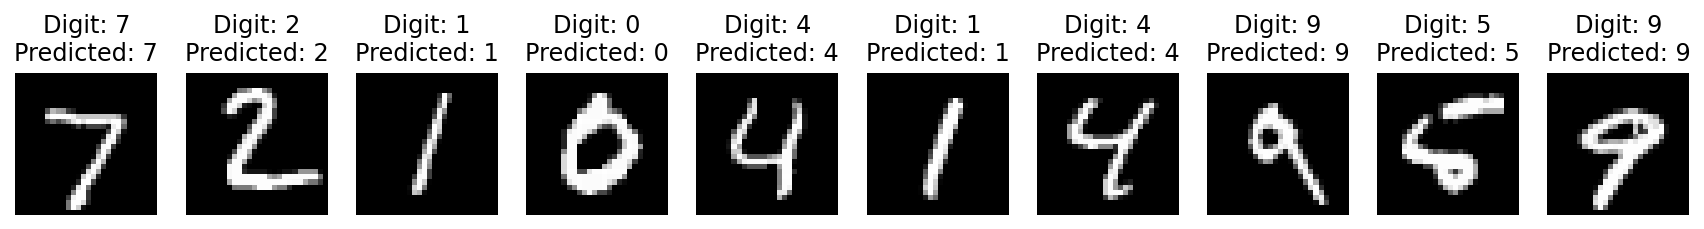

In [8]:
DNN(RMSprop(), 15)

Emergono in particolare due ottimizzatori che raggiungono un'accuratezza di poco superiore al $97 \%$: <i>SGD</i> con momento di Nesterov e <i>RMSprop</i>. Si ottiene un'ottima performance anche tramite <i>Adadelta</i>, la cui accuratezza si avvicina al $97 \%$. 

### Esercizio 12.2

In questo esercizio viene utilizzata una <b>CNN</b> (<i>Convolutional Neural Network</i>). La rete è costituita da 3 layer convoluzionali (con funzione di attivazione <i>Selu</i>), che calcolano la convoluzione dell'input con una serie di filtri,  e 3 layer di pooling, che effettuano un'operazione di coarse-graining dell'input. Tramite la funzione <i>Flatten</i> l'output matriciale della rete convoluzionale viene trasformato in input vettoriale per layer di tipo <i>Dense</i>. Vengono quindi aggiunti due layer di tipo <i>Dense</i> formati rispettivamente da $500$ e $100$ neuroni, entrambi con funzione di attivazione <i>Selu</i>. Il layer di output è sempre formato da $10$ neuroni con funzione di attivazione <i>softmax</i>. La rete viene allenata per $15$ epoche. Vengono riportati gli stessi grafici mostrati nel caso della DNN.

In [9]:
img_rows, img_cols = 28, 28 
num_classes = 10

# recupero il formato matriciale delle immagini
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

In [10]:
# for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [11]:
def create_CNN():
    # instantiate model
    model = Sequential()
    
    model.add(Conv2D(8, kernel_size=(4, 4), activation='selu', input_shape=input_shape))
    # add first MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #add second convolutional layer with 10 filters
    model.add(Conv2D(14, kernel_size=(3, 3),activation='selu'))
    # add second MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # add third convolutional layer
    model.add(Conv2D(18, kernel_size=(2, 2),activation='selu'))
    model.add(Dropout(0.2))
    # add third MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='selu'))
    model.add(Dense(100, activation='selu'))
    model.add(Dense(num_classes, activation='softmax'))
  
    model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=SGD(), metrics=['acc'])
    
    return model

In [12]:
model_CNN = create_CNN()
model_CNN.summary()
history = model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=15, verbose=0, validation_data=(X_test, Y_test))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 14)        1022      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 14)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 18)          1026      
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 18)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 18)         


Test loss = 0.042461320757865906
Test accuracy = 0.9851999878883362


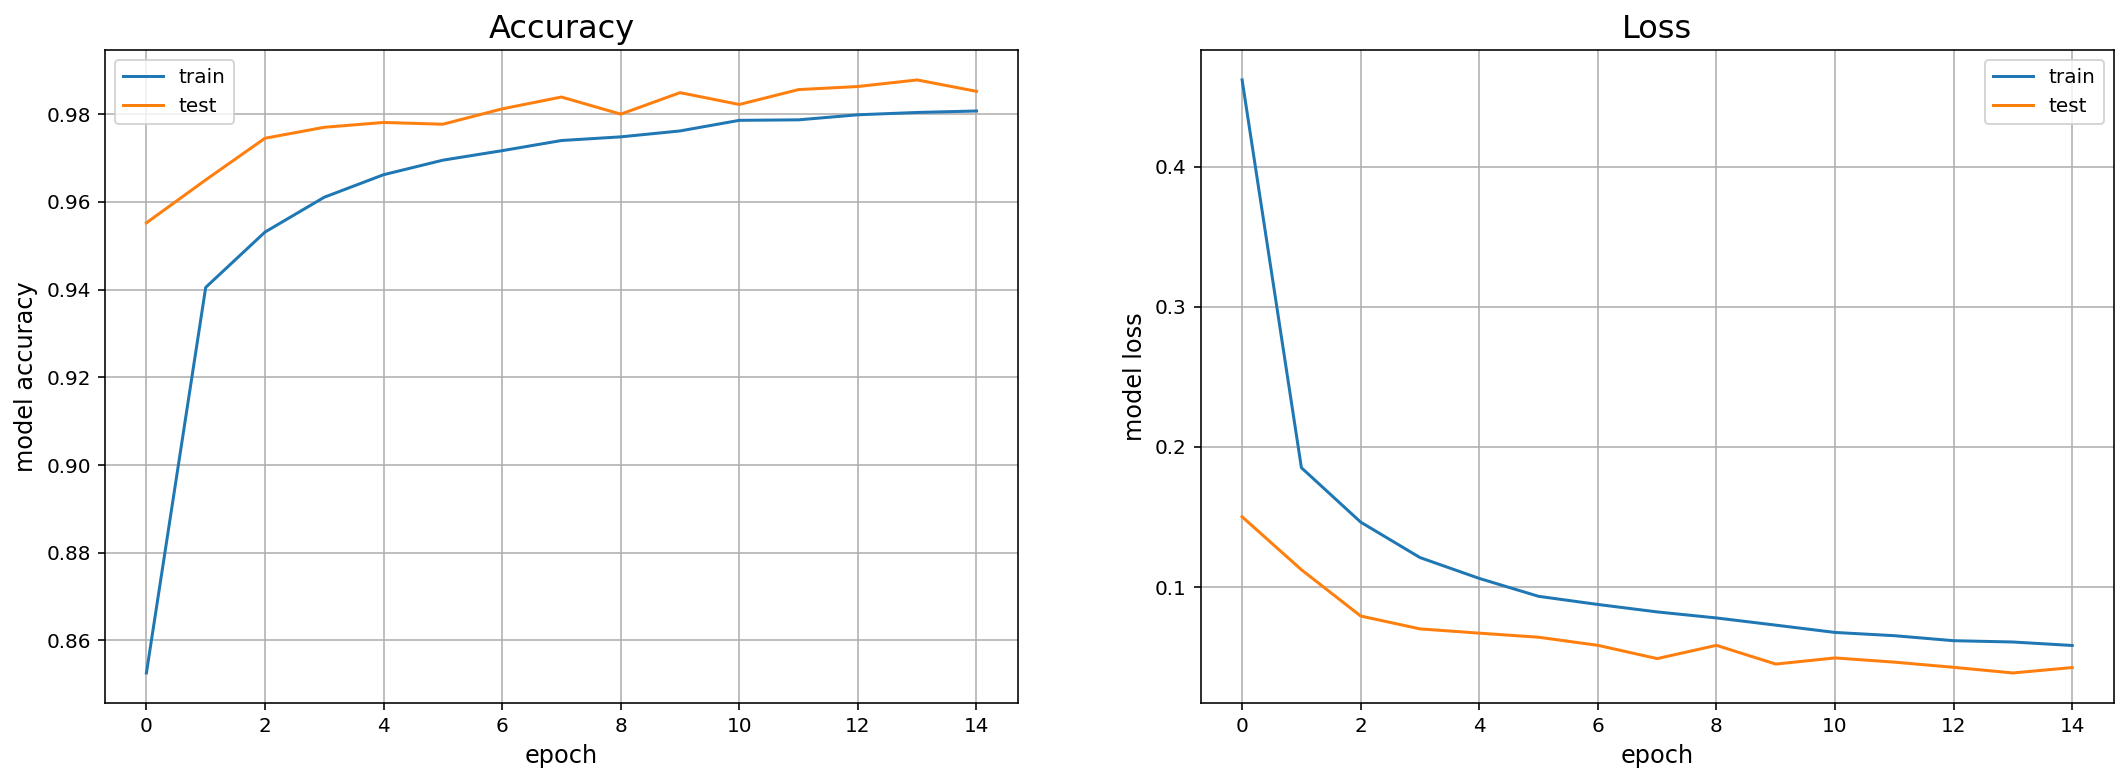

In [13]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)
# print performance
print()
print('Test loss =', score[0])
print('Test accuracy =', score[1])

# look into training history

fig, ax = plt.subplots(1,2, figsize=(18,6))

# summarize history for accuracy
ax[0].plot(history.history['acc'], color='tab:blue')
ax[0].plot(history.history['val_acc'], color='tab:orange')
ax[0].set_ylabel('model accuracy', fontsize=12)
ax[0].set_xlabel('epoch', fontsize=12)
ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['Train', 'Test'], loc='best', fontsize=12)
ax[0].grid(True)
    
# summarize history for loss
ax[1].plot(history.history['loss'], color='tab:blue')
ax[1].plot(history.history['val_loss'], color='tab:orange')
ax[1].set_ylabel('model loss', fontsize=12)
ax[1].set_xlabel('epoch', fontsize=12)
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train', 'test'], loc='best', fontsize=12)
ax[1].grid(True)
plt.show()

La rete raggiunge un'accuratezza pari a circa $98,5\%$, superiore rispetto a quanto ottenuto con la DNN. 

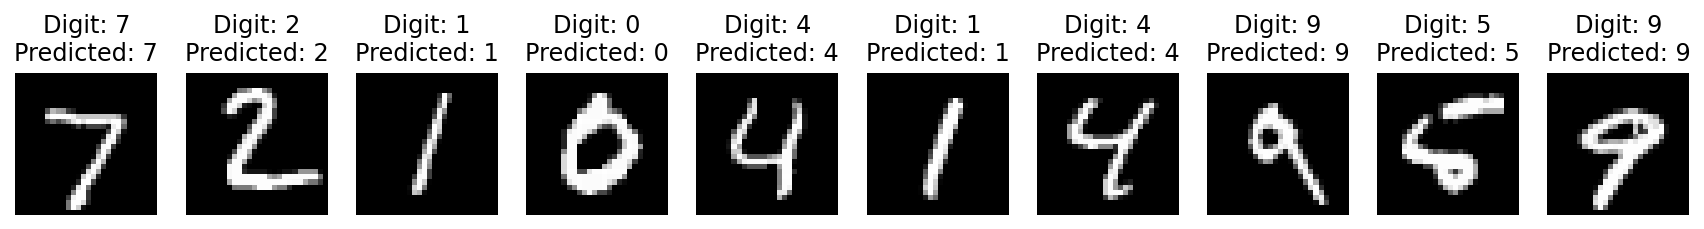

In [14]:
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

### Esercizio 12.3

Come ultimo esercizio viene testata la predizione della CNN sulle cifre scritte a mano da me.

In [15]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

digit_test = np.zeros((10,28, 28))
digit_target = np.zeros((10,10))

for k in range (10):
    digit_filename = "./Digits/{}.png".format(k)
    digit_in = Image.open(digit_filename).convert('L')
    digit_target[k,k] = 1
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]
    data /= 255
    digit_test[k] = data

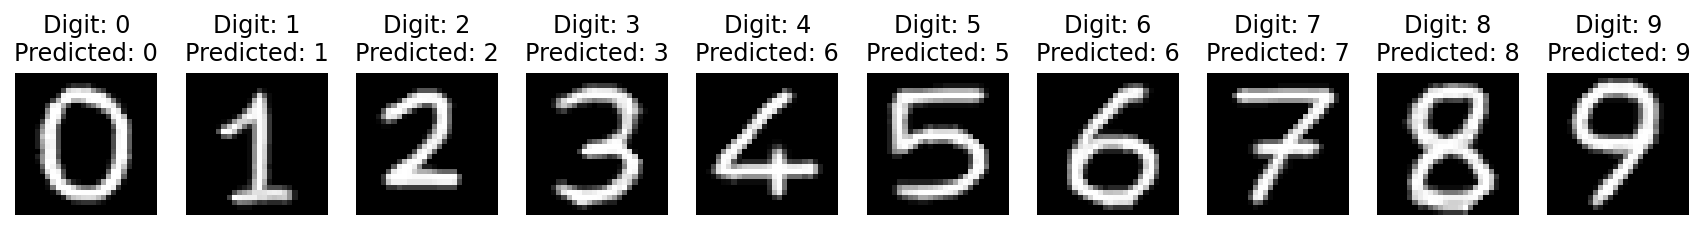

In [16]:
if tf.keras.backend.image_data_format() == 'channels_first':
    digit_test = digit_test.reshape(digit_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    digit_test = digit_test.reshape(digit_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

predictions = model_CNN.predict(digit_test)

fig = plt.figure(figsize=(15, 15))   
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)       
    plt.imshow(digit_test[i, :, :, 0], cmap='gray')   
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(digit_target[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

<b>Score: 9/10</b> <br>
La rete non è riuscita a riconoscere il numero $4$ a causa del modo diverso in cui ho scritto tale numero rispetto alle cifre presenti nel dataset MNIST. Anche il mio modo di scrivere le cifre $1$ e $7$ è diverso rispetto al dataset di allenamento, ma la rete riesce comunque a predirre correttamente questi due numeri.